In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [10]:
df = pd.read_csv('data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [46]:
df.head(5)
df.t.mean()

8.137595129375951

С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [80]:
temperature = []
for i in range(2008,2017):
    year = df[(df.Day >= pd.Timestamp(i, 1, 1)) & (pd.Timestamp(i+1, 1, 1) >= df.Day)]
    temperature.append(year.t.mean())
print('Самый теплый год:', 2008 + temperature.index(max(temperature)), 'год')
print('Самый холодный год:', 2008 + temperature.index(min(temperature)), 'год')

Самый теплый год: 2015 год
Самый холодный год: 2012 год


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [83]:
temperature = []
for i in range(2008,2017):
    year = df[(df['Day'] >= pd.Timestamp(i, 1, 1)) & (pd.Timestamp(i, 1, 31) >= df['Day']) & (df.t >=0)]
    temperature.append(year.t.mean())
    temperature.append(year.shape[0])
print('Наибольшее число дней с положительной температурой в январе:',\
          2008 + temperature.index(max(temperature)), 'год')

Наибольшее число дней с положительной температурой в январе: 2009 год


**3.** В каком году было самое холодное лето (по средней температуре)

In [86]:
temperature = []
for i in range(2008,2017):
    year = df[(df['Day'] >= pd.Timestamp(i, 6, 1)) & (pd.Timestamp(i, 8, 31) >= df['Day'])]
    temperature.append(year.t.mean())
print('Самое холодное лето:', 2008 + temperature.index(min(temperature)), 'год')

Самое холодное лето: 2008 год


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [132]:
temperature = np.array(df.t)
temperature = list(abs(temperature[1:] - temperature[:-1]))
idx = temperature.index(max(temperature))
str(df.Day[idx].date())

'2014-05-26'

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

Text(0.5, 0, 'Средняя температура')

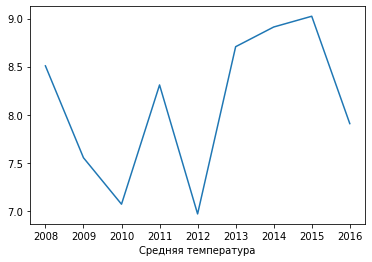

In [109]:
X = np.arange(2008,2017)
Y = []
for i in range(2008,2017):
    year = df[(df.Day >= pd.Timestamp(i, 1, 1)) & (pd.Timestamp(i+1, 1, 1) >= df.Day)]
    Y.append(year.t.mean())
plt.plot(X, Y)
plt.xlabel('Год')
plt.xlabel('Средняя температура')